In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv("/content/student_exam_scores.csv")

In [3]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [4]:
df.isnull().sum()

,0
student_id,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


In [5]:
df.columns

Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [7]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [8]:
df.drop("student_id",axis=1,inplace=True)

In [9]:
col = df.columns

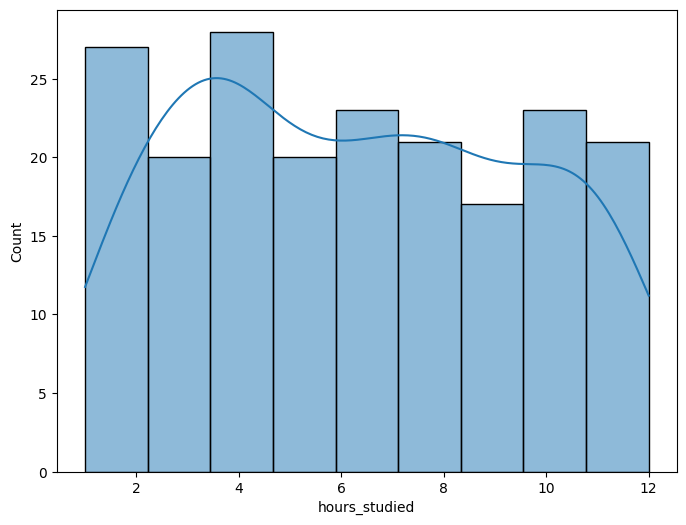

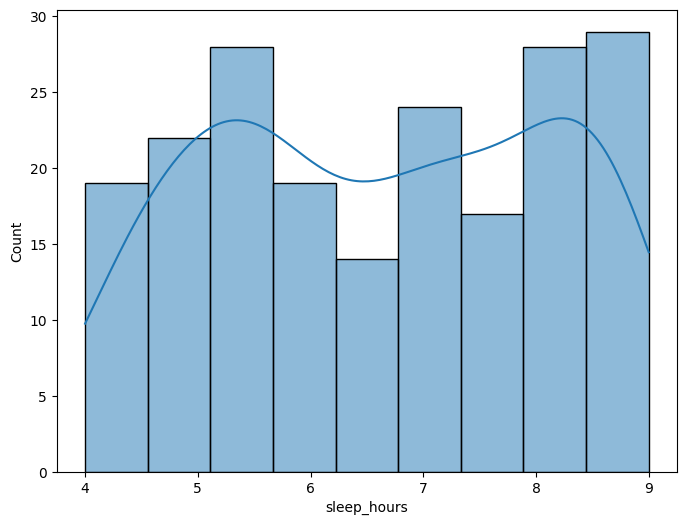

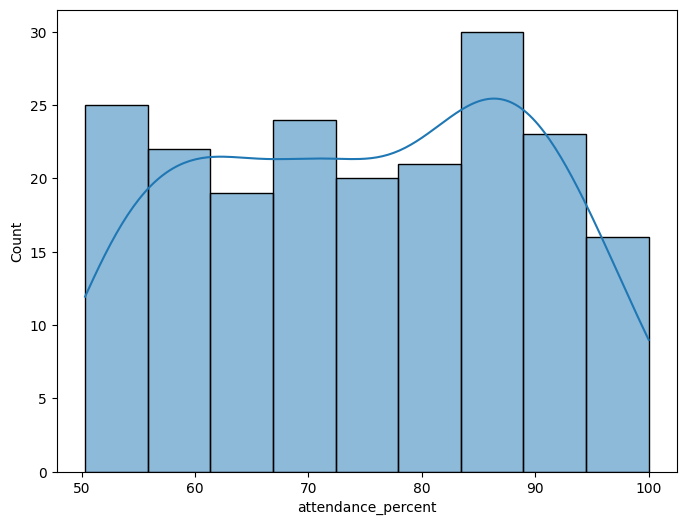

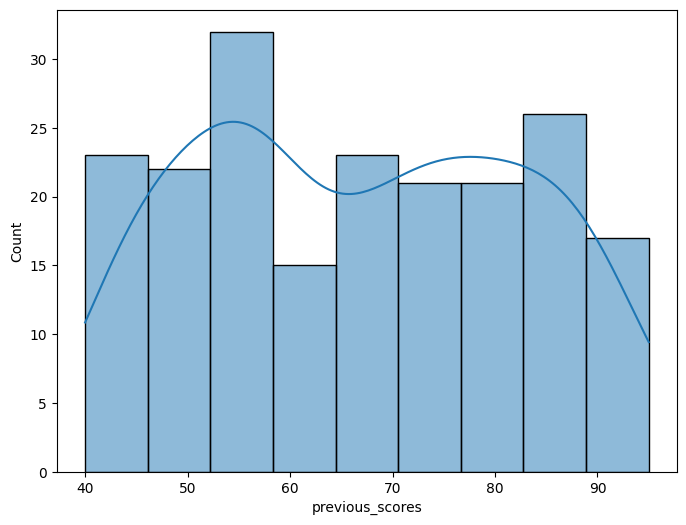

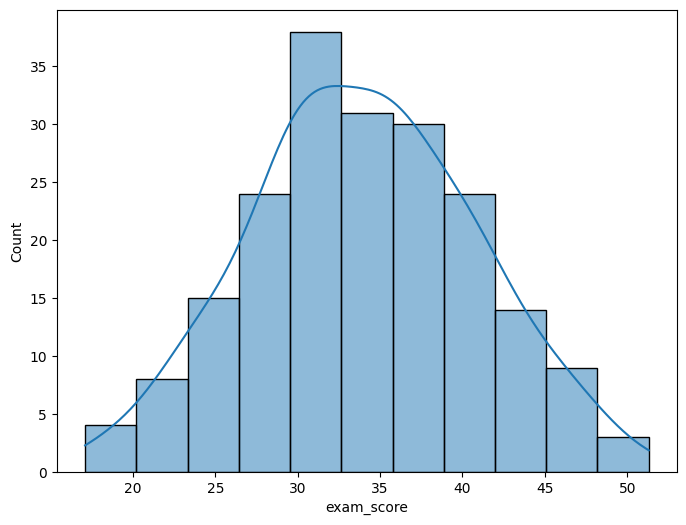

In [10]:
for c in col:
  plt.figure(figsize=(8,6))
  sns.histplot(df[c],kde=True)

In [11]:
df = df[(df['sleep_hours'] >= 3) & (df['sleep_hours'] <= 10)]

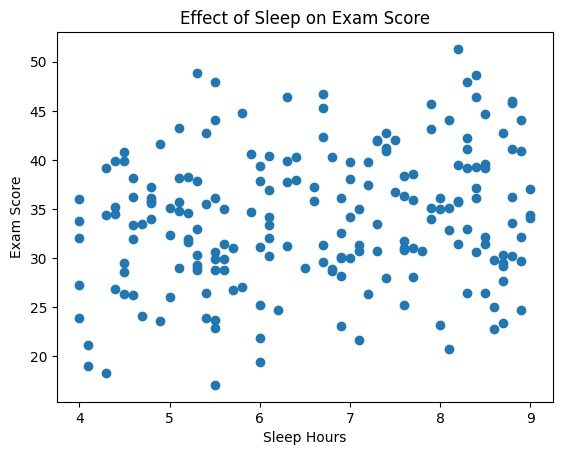

In [12]:
plt.scatter(df['sleep_hours'], df['exam_score'])
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("Effect of Sleep on Exam Score")
plt.show()

<Axes: xlabel='sleep_hours', ylabel='Count'>

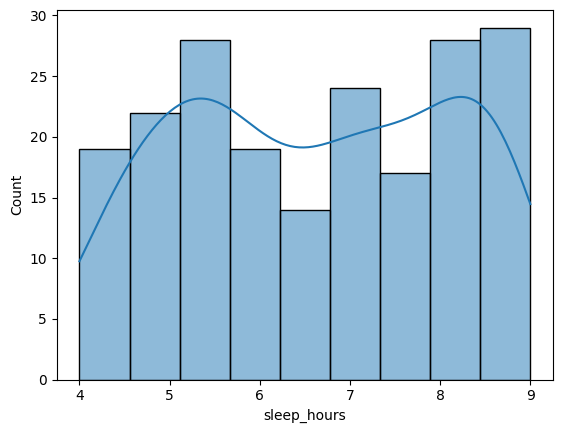

In [13]:
sns.histplot(df['sleep_hours'],kde=True)

In [14]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [16]:
X = df.drop("exam_score",axis=1)
y = df['exam_score']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.1, 1, 10, 50]
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.01, 0.1, 1]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 5, 10]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.05, 0.1]
        }
    }
}


In [19]:
results = []

for model_name, model_info in models.items():
    grid = GridSearchCV(
        model_info["model"],
        model_info["params"],
        cv=5,
        scoring="r2",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    })

In [20]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2 Score", ascending=False)

,Model,Best Params,MAE,MSE,R2 Score
0,LinearRegression,{},2.310858,7.761783,0.853745
2,Lasso,{'alpha': 0.01},2.312818,7.768729,0.853614
1,Ridge,{'alpha': 10},2.322134,7.807394,0.852885
3,RandomForest,"{'max_depth': 5, 'n_estimators': 100}",3.006096,11.212145,0.788730
4,GradientBoosting,"{'learning_rate': 0.1, 'n_estimators': 50}",2.947165,11.319013,0.786716


In [21]:
best_row = results_df.loc[results_df['R2 Score'].idxmax()]

print("Best Model:", best_row['Model'])
print("Best Parameters:", best_row['Best Params'])
print("R2 Score:", round(best_row['R2 Score'], 3))
print("MAE:", round(best_row['MAE'], 3))
print("MSE:", round(best_row['MSE'], 3))


Best Model: LinearRegression
Best Parameters: {}
R2 Score: 0.854
MAE: 2.311
MSE: 7.762


In [23]:
best_model_name = best_row['Model']

best_model = models[best_model_name]['model']
best_model.set_params(**best_row['Best Params'])
best_model.fit(X_train, y_train)

joblib.dump(best_model, "best_student_score_model.pkl")

print("Best model saved as: best_student_score_model.pkl")


Best model saved as: best_student_score_model.pkl
